Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



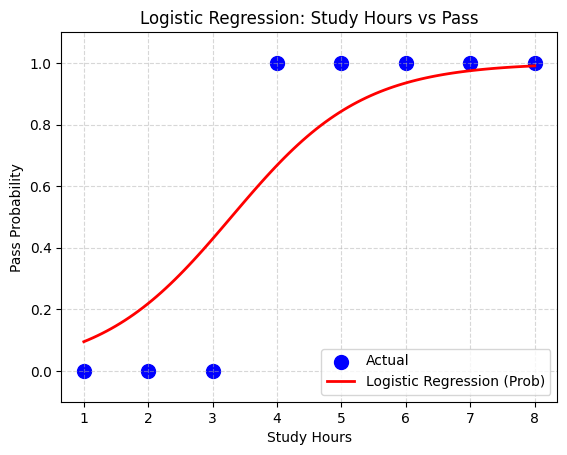

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Dataset: Study Hours vs Pass/Fail
data = {
    'Study Hours': [1, 2, 3, 4, 5, 6, 7, 8],
    'Pass': [0, 0, 0, 1, 1, 1, 1, 1]  # 0=Fail, 1=Pass
}
df = pd.DataFrame(data)

# Features and label
X = df[['Study Hours']].values
y = df['Pass'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot logistic regression curve
x_values = np.linspace(df['Study Hours'].min(), df['Study Hours'].max(), 100).reshape(-1, 1)
y_proba = model.predict_proba(x_values)[:, 1]  # Probability of Pass

plt.scatter(df['Study Hours'], df['Pass'], color='blue', s=100, label='Actual')
plt.plot(x_values, y_proba, color='red', linewidth=2, label='Logistic Regression (Prob)')

plt.xlabel('Study Hours')
plt.ylabel('Pass Probability')
plt.title('Logistic Regression: Study Hours vs Pass')
plt.legend()
plt.ylim(-0.1, 1.1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
